## Questions
Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Who reported watching more TV in 2012, men or women?

Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import os
os.chdir('C:\\Users\\M246047\\Documents\\Python')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
ess = pd.read_csv('ESSdata.csv')
print(ess.info())
ess.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 839.3+ KB
None


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [3]:
# Creating dataframes for each country

es = ess[ess['cntry'] == 'ES'].sort_values(by=['year'])
se = ess[ess['cntry'] == 'SE'].sort_values(by=['year'])
ch = ess[ess['cntry'] == 'CH'].sort_values(by=['year']) 
no = ess[ess['cntry'] == 'NO'].sort_values(by=['year'])
cz = ess[ess['cntry'] == 'CZ'].sort_values(by=['year'])
de = ess[ess['cntry'] == 'DE'].sort_values(by=['year'])

# Creating lists of each country's trust values
es_trust = es.ppltrst
se_trust = se.ppltrst
ch_trust = ch.ppltrst
no_trust = no.ppltrst
cz_trust = cz.ppltrst
de_trust = de.ppltrst

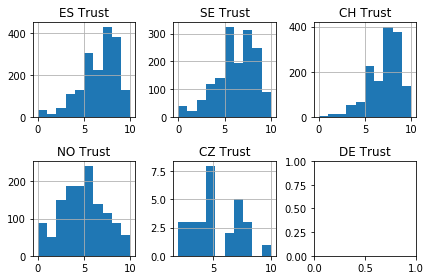

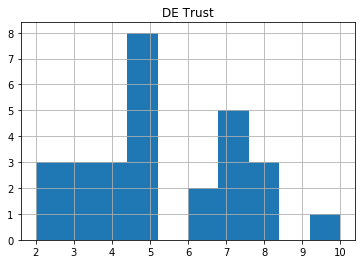

In [4]:
# Looking at the distribution to decide which comparison test to use.
es_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 1)
plt.title('ES Trust')

se_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)

plt.subplot(2, 3, 2)
plt.title('SE Trust')

ch_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 3)
plt.title('CH Trust')

no_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 4)
plt.title('NO Trust')

cz_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 5)
plt.title('CZ Trust')

de_trust.hist()
plt.subplot(2, 3, 6)
plt.title('DE Trust')
plt.show()

de_trust.hist()
plt.title('DE Trust')
plt.show()

In [41]:
# As the distributions do not appear to have known mathematical properties, I'll use the Kruskal-Wallis test.

def trust_kruskal_comparison_test(df):
    df_2012 = df[df['year'] == 6] 
    df_2012 = df_2012[['ppltrst']]
    df_2012_length = len(df_2012)
    df_2014 = df[df['year'] == 7]
    df_2014 = df_2014[['ppltrst']]
    df_2014_length = len(df_2014)
    ranks = stats.rankdata(df_2012 + df_2014)
    
    # Create a new dataframe of ranks
    new_df = pd.DataFrame()
    new_df['Ranks_2012'] = ranks[0:df_2012_length]
    new_df['Ranks_2014'] = ranks[df_2012_length:]
                       
    # Average rank per group.
    groups = ['Ranks_2012', 'Ranks_2014']
    print(new_df[groups].apply(np.mean))

    # Overall average rank.
    print(np.mean(ranks))

    # Print the test statistic followed by the probability of getting this result
    # if the groups were not different.
    print(stats.kruskal(
        new_df['Ranks_2012'],
        new_df['Ranks_2014']))

In [68]:
print('Comparison test for ES')
kruskal_comparison_test(es, 'ppltrst')
print('\n Comparison test for SE')
kruskal_comparison_test(se, 'ppltrst')
print('\n Comparison test for CH')
kruskal_comparison_test(ch, 'ppltrst')
print('\n Comparison test for NO')
kruskal_comparison_test(no, 'ppltrst')
print('\n Comparison test for CZ')
kruskal_comparison_test(cz, 'ppltrst')
print('\n Comparison test for DE')
kruskal_comparison_test(de, 'ppltrst')

Comparison test for ES
      ppltrst
2890      3.0
3702      3.0
3701      3.0
3700      5.0
3699      4.0
      ppltrst
4910      1.0
4914      1.0
4913      8.0
4912      8.0
4911      7.0
Ranks_2012    1817.501237
Ranks_2014     609.498763
dtype: float64
1213.5
KruskalResult(statistic=1803.7947778418402, pvalue=0.0)

 Comparison test for SE
      ppltrst
6778      7.0
7376      5.0
7377      7.0
7378      7.0
7379      8.0
      ppltrst
8292      8.0
8291      8.0
8290      8.0
8289      6.0
8283      1.0
Ranks_2012    1359.626652
Ranks_2014     457.373348
dtype: float64
908.5
KruskalResult(statistic=1344.0743387704806, pvalue=2.987938124745757e-294)

 Comparison test for CH
     ppltrst
0        3.0
510      5.0
511      4.0
512      5.0
513      6.0
      ppltrst
1289      4.0
1288      5.0
1287      7.0
1282      9.0
1285      8.0
Ranks_2012    1157.50194
Ranks_2014     389.49806
dtype: float64
773.5
KruskalResult(statistic=1143.820222117447, pvalue=9.885006003713769e-251)

 Comp

In [43]:
print('Comparison test for ES')
trust_kruskal_comparison_test(es)
print('\n Comparison test for SE')
trust_kruskal_comparison_test(se)
print('\n Comparison test for CH')
trust_kruskal_comparison_test(ch)
print('\n Comparison test for NO')
trust_kruskal_comparison_test(no)
print('\n Comparison test for CZ')
trust_kruskal_comparison_test(cz)
print('\n Comparison test for DE')
trust_kruskal_comparison_test(de)

Comparison test for ES
1213 1213
1213
Ranks_2012    1817.501237
Ranks_2014     609.498763
dtype: float64
1213.5
KruskalResult(statistic=1803.7947778418402, pvalue=0.0)

 Comparison test for SE
908 908
908
Ranks_2012    1359.626652
Ranks_2014     457.373348
dtype: float64
908.5
KruskalResult(statistic=1344.0743387704806, pvalue=2.987938124745757e-294)

 Comparison test for CH
773 773
773
Ranks_2012    1157.50194
Ranks_2014     389.49806
dtype: float64
773.5
KruskalResult(statistic=1143.820222117447, pvalue=9.885006003713769e-251)

 Comparison test for NO
731 731
731
Ranks_2012    1094.502052
Ranks_2014     368.497948
dtype: float64
731.5
KruskalResult(statistic=1080.8242494405422, pvalue=4.860242169393342e-237)

 Comparison test for CZ
658 658
658
Ranks_2012    984.75228
Ranks_2014    332.24772
dtype: float64
658.5
KruskalResult(statistic=969.8455577877248, pvalue=6.439543764940963e-213)

 Comparison test for DE
14 14
14
Ranks_2012    18.642857
Ranks_2014    10.357143
dtype: float64
14.

According to the Kruskal-Wallis test and pvalue, there is a significant difference between levels of trust in 2012 and 2014. It appears that people were more trusting in 2012 (as the mean of Ranks_2012 is greater than Ranks_2014?).

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

The distributions are mostly skewed to the left and do not appear to have mathematical properties, so I will use the Kruskal-Wallis test. 

In [52]:
# Creating lists of each country's trust values
es_happy = es.happy
se_happy = se.happy
ch_happy = ch.happy
no_happy = no.happy
cz_happy = cz.happy
de_happy = de.happy

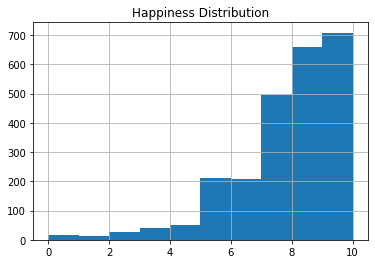

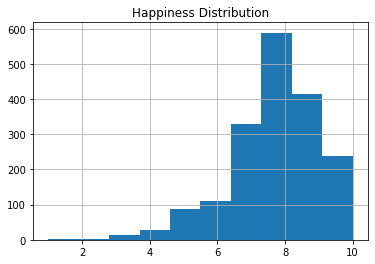

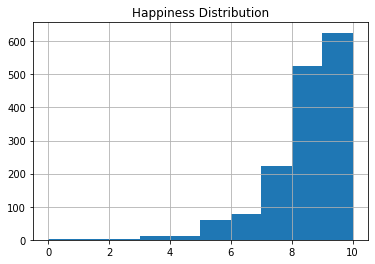

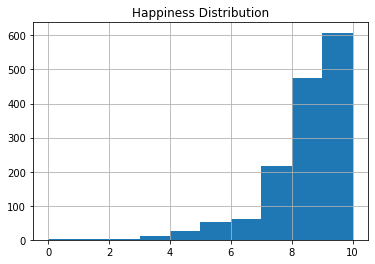

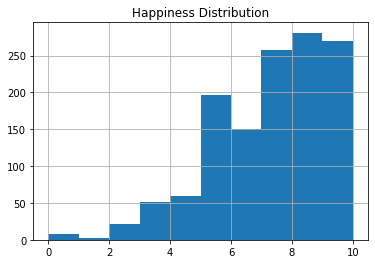

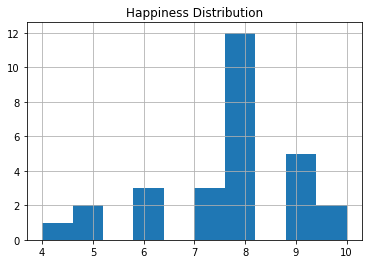

In [57]:
# Looking at the distribution to decide which comparison test to use.
for df in [es_happy, se_happy, ch_happy, no_happy, cz_happy, de_happy]:
    df.hist()
    plt.title('Happiness Distribution')
    plt.show()
    print('\n')



In [81]:
# As the distributions do not appear to have known mathematical properties, I'll use the Kruskal-Wallis test.

def rank_kruskal_comparison_test(df, column_of_interest):
    df_2012 = df[df['year'] == 6] 
    df_2012 = df_2012[[column_of_interest]]
    print(df_2012.head())
    df_2012_length = len(df_2012)
    print(df_2012_length)
    df_2014 = df[df['year'] == 7]
    df_2014 = df_2014[[column_of_interest]]
    print(df_2014.head())
    df_2014_length = len(df_2014)
    print(df_2014_length)
    ranks = stats.rankdata(df_2012 + df_2014)
    print('Ranks:', ranks[:10])
    
    # Create a new dataframe of ranks
    new_df = pd.DataFrame()
    new_df['Ranks_2012'] = ranks[0:df_2012_length]
    new_df['Ranks_2014'] = ranks[df_2012_length:]
    print(new_df.head())
                       
    # Average rank per group.
    groups = ['Ranks_2012', 'Ranks_2014']
    print(new_df[groups].apply(np.mean))

    # Overall average rank.
    print(np.mean(ranks))

    # Print the test statistic followed by the probability of getting this result
    # if the groups were not different.
    print(stats.kruskal(
        new_df['Ranks_2012'],
        new_df['Ranks_2014']))

In [113]:
# As the distributions do not appear to have known mathematical properties, I'll use the Kruskal-Wallis test.

def no_rank_kruskal_comparison_test(df, column_of_interest):
    df_2012 = df[df['year'] == 6] 
    df_2012 = df_2012[[column_of_interest]]
    print(type(df_2012), df_2012.head())
    print(df_2012.iloc[:,1])
    df_2014 = df[df['year'] == 7]
    df_2014 = df_2014[[column_of_interest]]
    print(df_2014.head())

#     data_list = list(df_2012 + df_2014)
#     print('List: ', data_list[:10])
    
    
    # Create a new dataframe of ranks
    new_df = pd.DataFrame()
    new_df['2012'] = df_2012.iloc[1]
    new_df['2014'] = df_2014.iloc[1]
    print('\n New DataFrame Head: \n', new_df.head())
                       
    # Average rank per group.
    groups = ['2012', '2014']
    print(new_df[groups].apply(np.mean))

    # Overall average rank.
    print(np.mean(ranks))

    # Print the test statistic followed by the probability of getting this result
    # if the groups were not different.
    print(stats.kruskal(
        new_df['2012'],
        new_df['2014']))

In [114]:
print('Happy Comparison test for ES')
no_rank_kruskal_comparison_test(es, 'happy')

print('\n')

print('Trust Comparison test for ES')
no_rank_kruskal_comparison_test(es, 'ppltrst')

Happy Comparison test for ES
<class 'pandas.core.frame.DataFrame'>       happy
2890    9.0
3702    7.0
3701    9.0
3700   10.0
3699    6.0


IndexError: single positional indexer is out-of-bounds

In [66]:
print('Comparison test for ES')
kruskal_comparison_test(es, 'happy')
print('\n Comparison test for SE')
kruskal_comparison_test(se, 'happy')
print('\n Comparison test for CH')
kruskal_comparison_test(ch, 'happy')
print('\n Comparison test for NO')
kruskal_comparison_test(no, 'happy')
print('\n Comparison test for CZ')
kruskal_comparison_test(cz, 'happy')
print('\n Comparison test for DE')
kruskal_comparison_test(de, 'happy')

Comparison test for ES
      happy
2890    9.0
3702    7.0
3701    9.0
3700   10.0
3699    6.0
      happy
4910    6.0
4914    8.0
4913    9.0
4912   10.0
4911   10.0
Ranks_2012    1817.501237
Ranks_2014     609.498763
dtype: float64
1213.5
KruskalResult(statistic=1803.7947778418402, pvalue=0.0)

 Comparison test for SE
      happy
6778    5.0
7376    7.0
7377    9.0
7378    8.0
7379    9.0
      happy
8292    8.0
8291    9.0
8290    9.0
8289    5.0
8283   10.0
Ranks_2012    1359.626652
Ranks_2014     457.373348
dtype: float64
908.5
KruskalResult(statistic=1344.0743387704806, pvalue=2.987938124745757e-294)

 Comparison test for CH
     happy
0      8.0
510    8.0
511    7.0
512    8.0
513    9.0
      happy
1289    9.0
1288    9.0
1287    8.0
1282   10.0
1285    9.0
Ranks_2012    1157.50194
Ranks_2014     389.49806
dtype: float64
773.5
KruskalResult(statistic=1143.820222117447, pvalue=9.885006003713769e-251)

 Comparison test for NO
      happy
5316    8.0
5799   10.0
5800    8.0
5801 